In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly.express as px

import os # used for navigating to image path
import imageio # used for writing images

from PIL import Image
from PIL import ImageFile

import datetime

import tensorflow as tf

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from skimage import io

##not sure why I need this but I do
ImageFile.LOAD_TRUNCATED_IMAGES = True

pd.set_option('max_colwidth', 300)


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [1]:
#importing test data, test dataframe with labels and column names

directory = '/Users/ilya/Desktop/Computer-Science/U-Capstone/raw_data'

test_images = np.load(os.path.join(directory,'test_images.npy'))
test_labels = np.load(os.path.join(directory, 'test_labels.npy'))

#test_df = pd.read_csv(os.path.join(directory, 'test_df.csv'))
#test_column_names = pd.read_csv(os.path.join(directory, 'test_label_column_names.csv'))

print("Done!")

NameError: name 'np' is not defined

In [4]:
#importing a pickled CNN model

model = tf.keras.models.load_model('/Users/ilya/Desktop/asl/asl_trained_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       7

In [5]:
model.evaluate(test_images, test_labels)

125/125 [==============================] - 32s 255ms/step - loss: 0.1231 - accuracy: 0.9630


[0.12313787639141083, 0.9629999995231628]

In [6]:
label_df = test_df.drop(columns = ['Unnamed: 0'])

y_probs = model.predict(test_images)

column_labels = test_column_names.drop(columns = ['Unnamed: 0']).columns.to_list()

pred_labels_df = pd.DataFrame(y_probs, columns = column_labels).round(5)

label_df['pred_label'] = pred_labels_df.idxmax(axis = 1)

label_df

,file_path,image_id,label,pred_label
0,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/P/P357.jpg,P357.jpg,P,P
1,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/L/L1377.jpg,L1377.jpg,L,L
2,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/Z/Z1751.jpg,Z1751.jpg,Z,Z
3,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/V/V2316.jpg,V2316.jpg,V,R
4,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/Y/Y389.jpg,Y389.jpg,Y,Y
...,...,...,...,...
3995,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/H/H1125.jpg,H1125.jpg,H,H
3996,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/E/E177.jpg,E177.jpg,E,E
3997,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/E/E141.jpg,E141.jpg,E,E
3998,/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/D/D2290.jpg,D2290.jpg,D,D


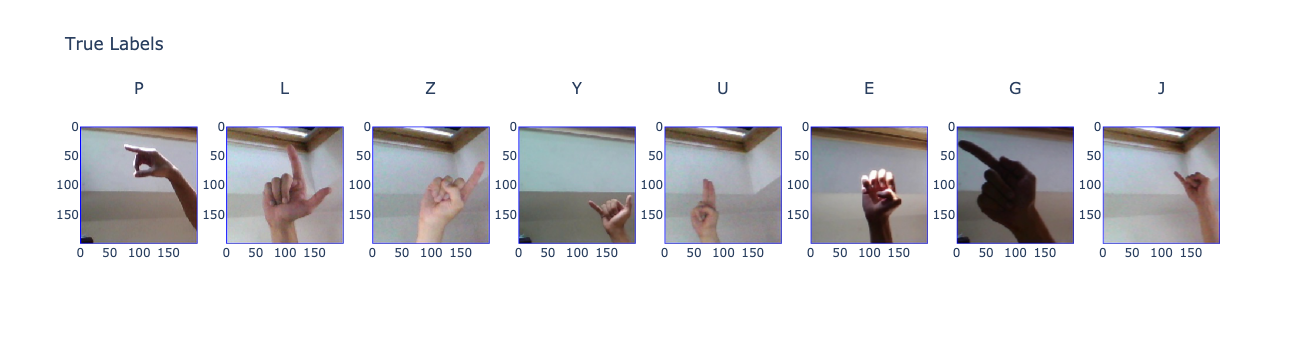

In [11]:
top_true_labels = label_df[label_df['label'] == label_df['pred_label']].head(8)
tuple_of_true_labels = tuple(top_true_labels['pred_label'].to_list())

fig = make_subplots(rows=1, cols=8, subplot_titles=tuple_of_true_labels)

for file_path, i in zip(top_true_labels['file_path'], range(1, len(tuple_of_true_labels)+1)):
    
    img = io.imread(file_path)
    
    fig.add_trace(go.Image(z=img), 1, i)

fig.update_layout(height = 350, width = 1300, title_text = 'True Labels')
fig.show("png", height = 350, width = 1300)

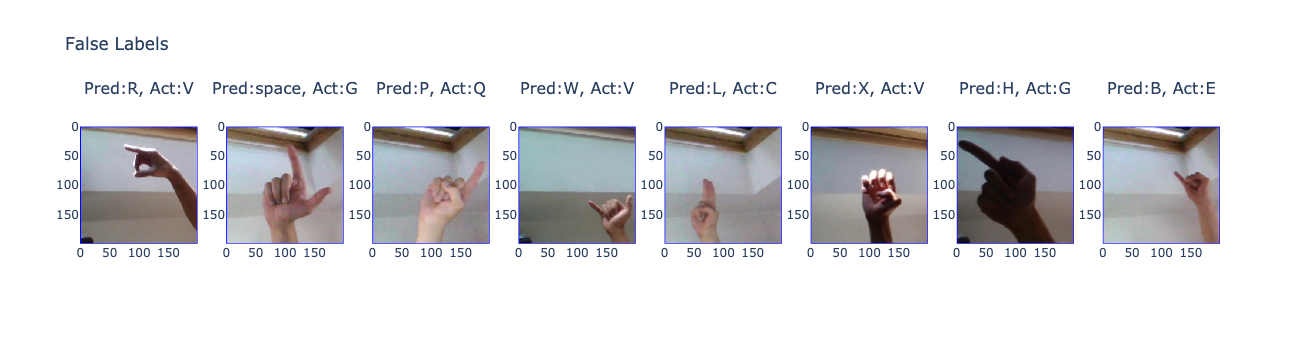

In [12]:
top_false_labels = label_df[label_df['label'] != label_df['pred_label']].head(8)

list_of_false_labels = ["Pred:"+str(pred_label)+", Act:"+str(label)
                  for label, pred_label in
                  zip(top_false_labels['label'], top_false_labels['pred_label'])]

tuple_of_false_labels = tuple(list_of_false_labels)

fig = make_subplots(rows=1, cols=8, subplot_titles=tuple_of_false_labels)

for file_path, i in zip(top_true_labels['file_path'], range(1, len(tuple_of_true_labels)+1)):
    
    img = io.imread(file_path)
    
    fig.add_trace(go.Image(z=img), 1, i)

fig.update_layout(height = 350, width = 1300, title_text = 'False Labels')
fig.show("png", height = 350, width = 1300)

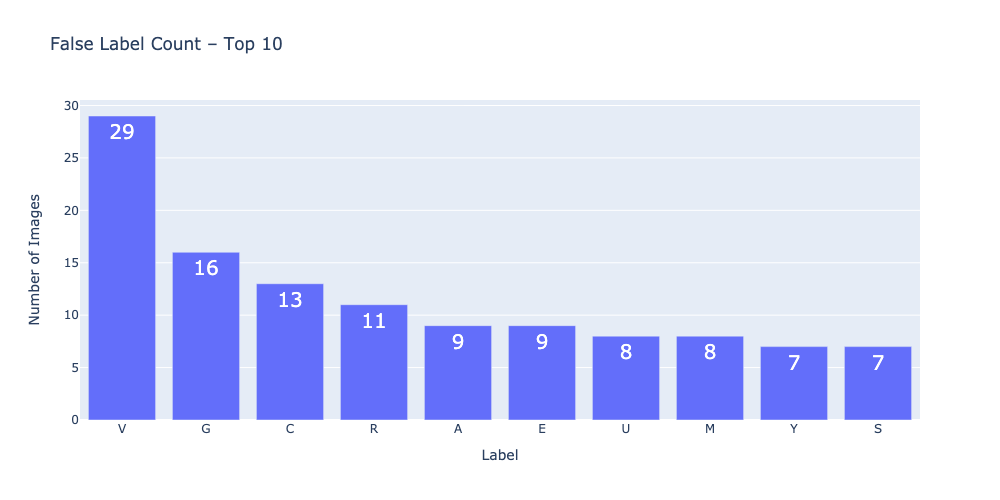

In [23]:
import plotly.graph_objects as go

# observing the most common issues – letter V, G and C seem to be the most problematic for the model to understand

false_label_count_df = label_df[label_df['label'] != label_df['pred_label']].groupby('label').count().reset_index()
false_label_count_df = false_label_count_df[['label','file_path']].rename(columns = {'file_path':'image_count'}).\
                        sort_values(by = 'image_count', ascending = False).head(10)

false_label_count_df

fig = go.Figure([go.Bar(x=false_label_count_df['label'],
                        y=false_label_count_df['image_count'],
                        text = false_label_count_df['image_count'])])

fig.update_traces(textposition='inside', textfont_size=20, texttemplate='%{text}')

fig.update_layout(title_text = 'False Label Count – Top 10',
                  yaxis_title = 'Number of Images',
                  xaxis_title = 'Label')

fig.show("png", height = 500, width = 1000)